# General Mass Balance on a Single Tank

This [IPython notebook](http://ipython.org/notebook.html) demonstrates the application of a mass balance to a simple water tank. This example is adapted with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

J.C. Kantor (Kantor.1@nd.edu)

The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

## Problem Statement

### Draw a Diagram

<img src="https://raw.github.com/jckantor/CBE20255/master/notebooks/images/water_tank.png" width=250px>

### Mass Balance

Using our general principles for a mass balance

$\frac{d(\rho V)}{dt} = \dot{m}_1 - \dot{m}_2$

which can be simplified to

$\frac{dV}{dt} = \frac{1}{\rho}\left(\dot{m}_1 - \dot{m}_2\right)$

where the initial value is $V(0) = 1\,\mbox{m}^3$. This is a differential equation.

### Numerical Solution using `odeint`

There are a number of numerical methods available for solving differential equations. Here we use [`odeint`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) which is part of the [`scipy`](http://www.scipy.org/) package.  `odeint` requires a function that returns the rate of accumulation in the tank as a function of the current volume and time.

In [1]:
# Flowrates in kg/sec
m1 = 4.0
m2 = 2.0

# Density in kg/m**3
rho = 1000.0

# Function to compute accumulation rate
def dV(V,t): return (m1 - m2)/rho;

Next we import `odeint` from the `scipy.integrate` package, set up a grid of times at which we wish to find solution values, then call `odeint` to compute values for the solution starting with an initial condition of 1.0.

In [2]:
from scipy.integrate import odeint

t = linspace(0,1000)
V = odeint(dV,1.0,t)

We finish by plotting the results of the integration and comparing to the capacity of the tank.

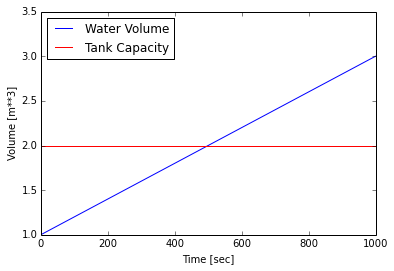

In [3]:
plot(t,V,'b',t,2*ones(len(t)),'r')
xlabel('Time [sec]')
ylabel('Volume [m**3]')
legend(['Water Volume','Tank Capacity'],'upper left');

This same approach can be used solve systems of differential equations. For an light-hearted (but very useful) example, check out [this solution](http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT) for the [Zombie Apocalypse](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf).

### Solving for the Time Required to Fill the Tank

Now that we know how to solve the differential equation, next we create a function to compute the air volume of the tank at any given time.

In [4]:
Vtank = 2.0
Vinitial = 1.0

def Vwater(t): 
    return odeint(dV,Vinitial,[0,t])[-1][0]

def Vair(t): 
    return Vtank - Vwater(t)

print "Air volume in the tank at t = 100 is {:4.2f} m**3.".format(Vair(100))

Air volume in the tank at t = 100 is 0.80 m**3.


The next step is find the time at which `Vair(t)` returns a value of 0. This is [root finding](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#root-finding) which the function [`brentq`](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.brentq.html) will do for us.

In [5]:
from scipy.optimize import brentq

t_full = brentq(Vair,0,1000)

print "The tank will be full at t = {:6.2f} seconds.".format(t_full)

The tank will be full at t = 500.00 seconds.


## Exercise

Suppose the tank was being used to protect against surges in water flow, and the inlet flowrate was a function of time where

$\dot{m}_1 = 4 e^{-t/500}$

* Will the tank overflow?  
* Assuming it doesn't overflow, how long would it take for the tank to return to its initial condition of being half full? To empty completely?
* What will be the peak volume of water in the tank, and when will that occur?